In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os 

In [3]:
files = os.listdir(r'C:\uber-pickups-in-new-york-city-20210409T092013Z-001\uber-pickups-in-new-york-city')[-7:]
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [4]:
files.remove('uber-raw-data-janjune-15.csv')

In [5]:
files

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [6]:
path = r'C:\uber-pickups-in-new-york-city-20210409T092013Z-001\uber-pickups-in-new-york-city'

final = pd.DataFrame()

for file  in files:
    df = pd.read_csv(path+"/"+file,encoding ='utf-8')
    final = pd.concat([df,final])

In [7]:
final.shape

(4534327, 4)

In [8]:
df = final.copy()

In [9]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [10]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [11]:
df['Date/Time'] =  pd.to_datetime(df['Date/Time'],format = '%m/%d/%Y  %H:%M:%S')

In [12]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [13]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [14]:
df['weekday'] = df['Date/Time'].dt.day_name()
df['day'] = df['Date/Time'].dt.day
df['minute'] = df['Date/Time'].dt.minute
df['month'] = df['Date/Time'].dt.month
df['hour'] = df['Date/Time'].dt.hour

In [15]:
df.head()

,Date/Time,Lat,Lon,Base,weekday,day,minute,month,hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,1,1,9,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,1,1,9,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,1,3,9,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,1,6,9,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,1,11,9,0


In [43]:
df['weekday'].value_counts()

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: weekday, dtype: int64

(array([216928., 103517., 227152., 543565., 324851., 366329., 819491.,
        660869., 579117., 692508.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

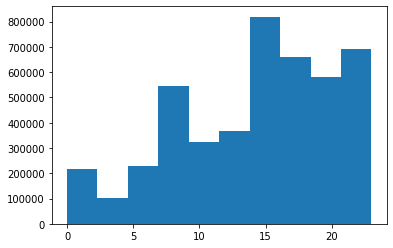

In [44]:
plt.hist(df['hour'])

Text(0.5, 1.0, 'Journy by day in a Month')

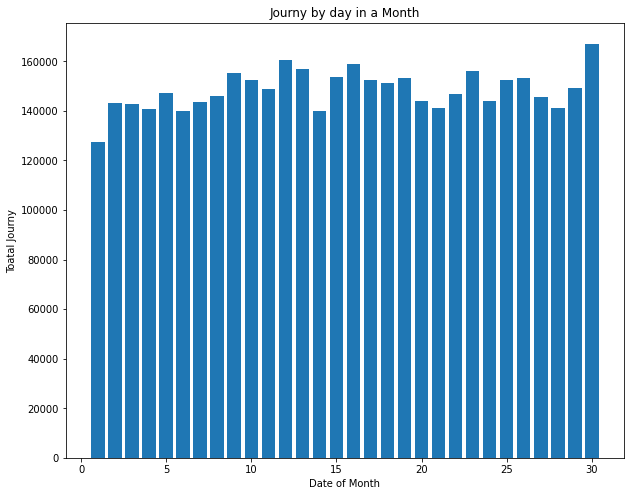

In [45]:
plt.figure(figsize=(10,8))
plt.hist(df['day'],bins=30,rwidth=0.8,range=(0.5,30.5))
plt.xlabel('Date of Month')
plt.ylabel('Toatal Journy')
plt.title('Journy by day in a Month')

c:\users\pratik g ratnaparkhi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='day', ylabel='Density'>

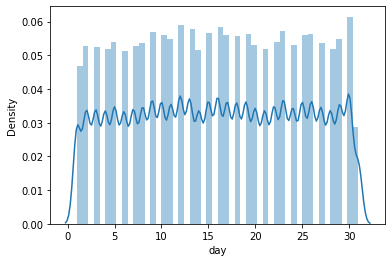

In [46]:
sns.distplot(df['day'])

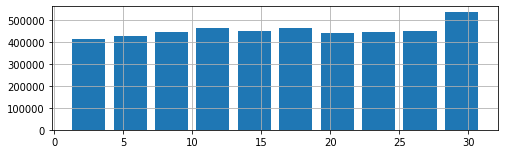

In [47]:
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.hist(df['day'],rwidth=0.8)
plt.grid()


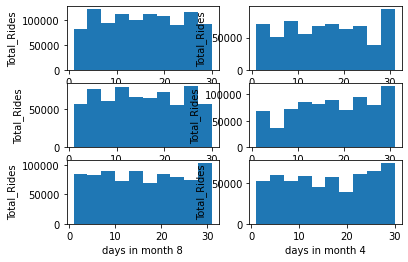

In [48]:
for i,month in enumerate(df['month'].unique(),1):
    plt.subplot(3,2,i)
    df_out = df[df['month']==month]
    plt.hist(df_out['day'])
    plt.xlabel('days in month {}'.format(month))
    plt.ylabel('Total_Rides')

In [ ]:
ax=sns.pointplot(x='hour',y='Lat',data=df,hue='weekday')
as.set_title('hours per day vs latitude of passengers')

In [50]:
base=df.groupby(['Base','month'])['Date/Time'].count().reset_index()
base

,Base,month,Date/Time
0,B02512,4,35536
1,B02512,5,36765
2,B02512,6,32509
3,B02512,7,35021
4,B02512,8,31472
5,B02512,9,34370
6,B02598,4,183263
7,B02598,5,260549
8,B02598,6,242975
9,B02598,7,245597


<AxesSubplot:xlabel='month', ylabel='Date/Time'>

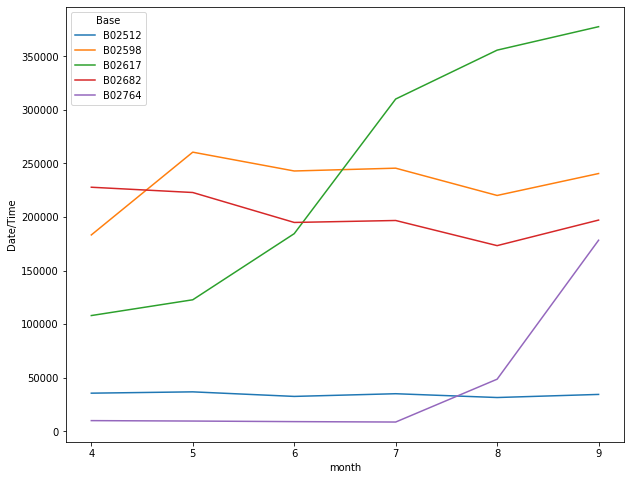

In [55]:
plt.figure(figsize=(10,8))
sns.lineplot(x='month',y='Date/Time',hue='Base',data=base)


In [57]:
def count_rows(rows):
    return len(rows)

In [59]:
by_cross = df.groupby(['weekday','hour']).apply(count_rows)
by_cross

weekday    hour
Friday     0       13716
           1        8163
           2        5350
           3        6930
           4        8806
                   ...  
Wednesday  19      47017
           20      47772
           21      44553
           22      32868
           23      18146
Length: 168, dtype: int64

In [60]:
pivot = by_cross.unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,...,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,...,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


<AxesSubplot:xlabel='hour', ylabel='weekday'>

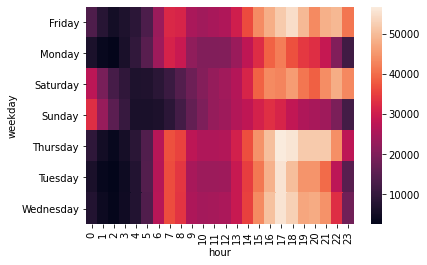

In [61]:
sns.heatmap(pivot)

In [62]:
def heatmap(col1,col2):
    by_cross = df.groupby([col1,col2]).apply(count_rows)
    pivot = by_cross.unstack()
    plt.figure(figsize=(10,8))
    return sns.heatmap(pivot)

<AxesSubplot:xlabel='hour', ylabel='day'>

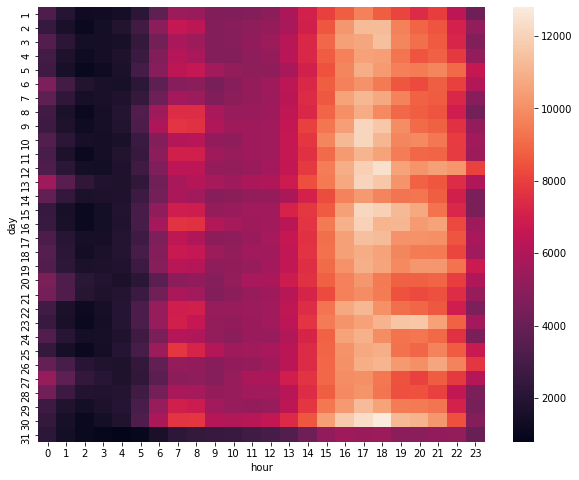

In [63]:
heatmap('day','hour')

<AxesSubplot:xlabel='month', ylabel='day'>

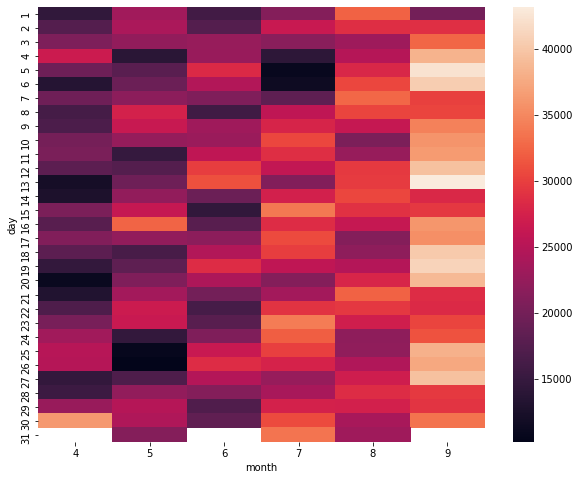

In [64]:
heatmap('day','month')

In [70]:
uber_15 = pd.read_csv(r'C:\Users\Pratik G Ratnaparkhi\Downloads\uber-pickups-in-new-york-city-20210409T092013Z-001\uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv')

In [71]:
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [83]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'],format = '%Y-%m-%d %H:%M:%S')

In [82]:
uber_15.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object